In [ ]:
!pip install pip==22.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


# Installing the required libraries

In [ ]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 32.9 MB/s eta 0:00:00


# Creating a virtual environment called `venv`

In [ ]:
!virtualenv venv

created virtual environment CPython3.10.12.final.0-64 in 948ms
  creator CPython3Posix(dest=/content/venv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==23.1.2, setuptools==67.8.0, wheel==0.40.0
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


# Activating the virtual environment

In [ ]:
!source venv/bin/activate

# Environment Sanity Check

In [ ]:
!nvidia-smi

Fri Jul  7 13:14:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installing RAPIDS

In [ ]:
#  This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 5.95 MiB/s, done.
Resolving deltas: 100% (191/191), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.5 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.3/489.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Installing `pyarrow==10.0.1`

In [ ]:
!pip install pyarrow==10.*

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 11.0.0
    Uninstalling pyarrow-11.0.0:
      Successfully uninstalled pyarrow-11.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 10.0.1 which is incompatible.
cudf-cu11 23.6.1 requires pyarrow==11.*, but you have pyarrow 10.0.1 which is incompatible.


# Linking the Notebook to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Unzipping the dataset from Google Drive and loading it into the current working directory

In [ ]:
!unzip /content/gdrive/MyDrive/Loan_status_2007-2020Q3.gzip.zip > /dev/null

# Importing the required libraries

In [ ]:
from dask.distributed import Client
from dask_cuda import LocalCUDACluster
import dask_cudf
import cudf
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import random
import os

# Explicitly defining the data types in the data set

In [ ]:
dtype={'acc_now_delinq': 'float64',
       'annual_inc': 'float64',
       'chargeoff_within_12_mths': 'float64',
       'collections_12_mths_ex_med': 'float64',
       'delinq_2yrs': 'float64',
       'delinq_amnt': 'float64',
       'fico_range_high': 'float64',
       'fico_range_low': 'float64',
       'funded_amnt': 'float64',
       'funded_amnt_inv': 'float64',
       'hardship_end_date': 'object',
       'hardship_loan_status': 'object',
       'hardship_reason': 'object',
       'hardship_start_date': 'object',
       'hardship_status': 'object',
       'hardship_type': 'object',
       'id': 'object',
       'inq_last_6mths': 'float64',
       'last_fico_range_high': 'float64',
       'last_fico_range_low': 'float64',
       'loan_amnt': 'float64',
       'next_pymnt_d': 'object',
       'open_acc': 'float64',
       'payment_plan_start_date': 'object',
       'policy_code': 'float64',
       'pub_rec': 'float64',
       'pub_rec_bankruptcies': 'float64',
       'revol_bal': 'float64',
       'sec_app_earliest_cr_line': 'object',
       'tax_liens': 'float64',
       'total_acc': 'float64',
       'verification_status_joint': 'object'
       }

# Create a Dask cluster with GPU workers

In [ ]:
cluster = LocalCUDACluster()
client = Client(cluster)

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:32865
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33681'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://127.0.0.1:37051', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:37051
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59566
INFO:distributed.scheduler:Receive client connection: Client-fb950b86-1cc9-11ee-83ac-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:59572


# Loading the dataset

In [ ]:
# Define the path to the CSV file
csv_path = 'Loan_status_2007-2020Q3.gzip'

# Read the CSV file into a Dask-cuDF DataFrame
df = dask_cudf.read_csv(csv_path, dtype=dtype)

# Displaying the first five rows of the dataset

In [ ]:
df.head()

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,N


# 1. Data Wrangling
<h3> Determining the count of numerical and categorical columns </h3>

In [ ]:
dtypes = df.dtypes

# Count the number of categorical and numeric columns
categorical = dtypes[dtypes == 'object']
numeric = dtypes[dtypes != 'object']

print("Number of categorical columns:", categorical.count())
print("Number of numeric columns:", numeric.count())

Number of categorical columns: 35
Number of numeric columns: 107


> ## 1.1 Checking for missing values

In [ ]:
missing_values = df.isna().sum().compute()

In [ ]:
missing_values

Unnamed: 0                                          0
id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
                                               ...   
hardship_loan_status                          2782082
orig_projected_additional_accrued_interest    2746253
hardship_payoff_balance_amount                2743417
hardship_last_payment_amount                  2743417
debt_settlement_flag                                1
Length: 142, dtype: int64

> ## 1.2. Dropping columns that have missing values greater than or equal to a given threshold

In [ ]:
missing_percentage = df.isna().mean().compute()

In [ ]:
missing_percentage

Unnamed: 0                                    0.000000e+00
id                                            0.000000e+00
loan_amnt                                     3.418227e-07
funded_amnt                                   3.418227e-07
funded_amnt_inv                               3.418227e-07
                                                  ...     
hardship_loan_status                          9.509789e-01
orig_projected_additional_accrued_interest    9.387317e-01
hardship_payoff_balance_amount                9.377623e-01
hardship_last_payment_amount                  9.377623e-01
debt_settlement_flag                          3.418227e-07
Length: 142, dtype: float64

**Utility function to drop columns whose percentage of missing values are greater than or equal to a given threshold**

In [ ]:
def drop_columns_with_high_missing_percentage(df, percentage=0.6):
  columns_to_be_dropped = []
  missing_percentage = df.isna().mean().compute()
  for column_name, value in missing_percentage.to_pandas().items():
    if value >= percentage:
      columns_to_be_dropped.append(column_name)

  return df.drop(columns_to_be_dropped, axis=1).compute()

In [ ]:
clean_df = drop_columns_with_high_missing_percentage(df)

In [ ]:
len(df.columns), len(clean_df.columns)

(142, 108)

> ## 1.3. Filling missing values

In [ ]:
def fill_missing_values(df):
    # get the column names and data types
    dtypes = df.dtypes

    # separate the numeric and categorical columns
    num_cols = dtypes[dtypes != 'O'].index.tolist()
    cat_cols = dtypes[dtypes == 'O'].index.tolist()


    # Convert numeric columns to float32
    df[num_cols] = df[num_cols].astype('float64')

    # fill missing values in numeric columns with mean
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    # fill missing values in categorical columns with backfill
    df[cat_cols] = df[cat_cols].fillna(method='bfill')

    return df


**Utility function to fill missing values based on the data type of the column**

In [ ]:
clean_df = fill_missing_values(clean_df)

> ## 1.4. Convert columns with % to numeric

In [ ]:
try:
  clean_df['int_rate'] = pd.to_numeric(clean_df['int_rate'].str.rstrip('%').to_pandas()) / 100
  clean_df['revol_util'] = pd.to_numeric(clean_df['revol_util'].str.rstrip('%').to_pandas()) / 100
except AttributeError:
  pass

In [ ]:
clean_df.select_dtypes(include=['float64']).columns

Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within

> ## 1.5. Convert `id` column to numeric

In [ ]:
clean_df['id'] = pd.to_numeric(clean_df['id'].to_pandas(), errors='coerce')

In [ ]:
clean_df['id'] = clean_df['id'].fillna(method='bfill')

> ## 1.6. Dropping the `Unnamed: 0` column

In [ ]:
clean_df.drop(['Unnamed: 0'], axis=1, inplace=True)

> ## 1.7 Feature Selection

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

**Installing a compatible version of distributed & dask-ml**

In [ ]:
!pip uninstall distributed -y
!pip install distributed==2022.12.1
!pip install dask-ml

Found existing installation: distributed 2023.3.2.1
Uninstalling distributed-2023.3.2.1:
  Successfully uninstalled distributed-2023.3.2.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.1/930.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.4 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2023.3.2
    Uninstalling dask-2023.3.2:
      Successfully uninstalled dask-2023.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
raft-dask-cu11 23.6.2 requires dask==2023.3.2, but you have dask 2022.12.1 which is incompatible.
raft-dask-cu11 23.6.2 requires distributed==2023.3.2.1, but you have distributed 2022.12.1 which is incompatible.
dask-cudf-cu11 23.6.0 requires dask==2023.3.2, but you have dask 2022.12.1 which is incompatible.
dask-cudf-cu11 23.6.0 requires distributed==2023.3.2.1, but you

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 7.6 MB/s eta 0:00:00


**Sample `n`% of the data randomly**

In [ ]:
n=0.001
sampled_df = clean_df.sample(frac=n, random_state=42)

> ## 1.7.1 Using `RandomForestClassifier`

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**Select top `k` features**

In [ ]:
k=40

In [ ]:
X = sampled_df.drop('loan_status', axis=1).to_pandas()
y = sampled_df['loan_status'].to_pandas()

In [ ]:
# Encode categorical features using LabelEncoder
cat_columns = X.select_dtypes(include=['object']).columns
for col in cat_columns:
    encoder = LabelEncoder()
    X[col] = encoder.fit_transform(X[col].astype(str))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Evaluate model performance on the testing data
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on all features: {accuracy}")

# Select top 40 features
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance'])
selected_features = feature_importances.nlargest(k, 'importance').index

# Filter data to keep only the top 40 features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Fit the model on the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Evaluate model performance on the testing data
accuracy = clf_selected.score(X_test_selected, y_test)
print(f"Accuracy on selected features: {accuracy}")

Accuracy on all features: 0.9709401709401709
Accuracy on selected features: 0.976068376068376


**Get the top `k` features and their importances**

In [ ]:
# Print top k features and their importances
top_k_feature_importances = feature_importances.loc[selected_features]
top_k_feature_importances.head()

,importance
out_prncp_inv,0.176808
out_prncp,0.151537
last_pymnt_d,0.077322
last_pymnt_amnt,0.070179
recoveries,0.049012


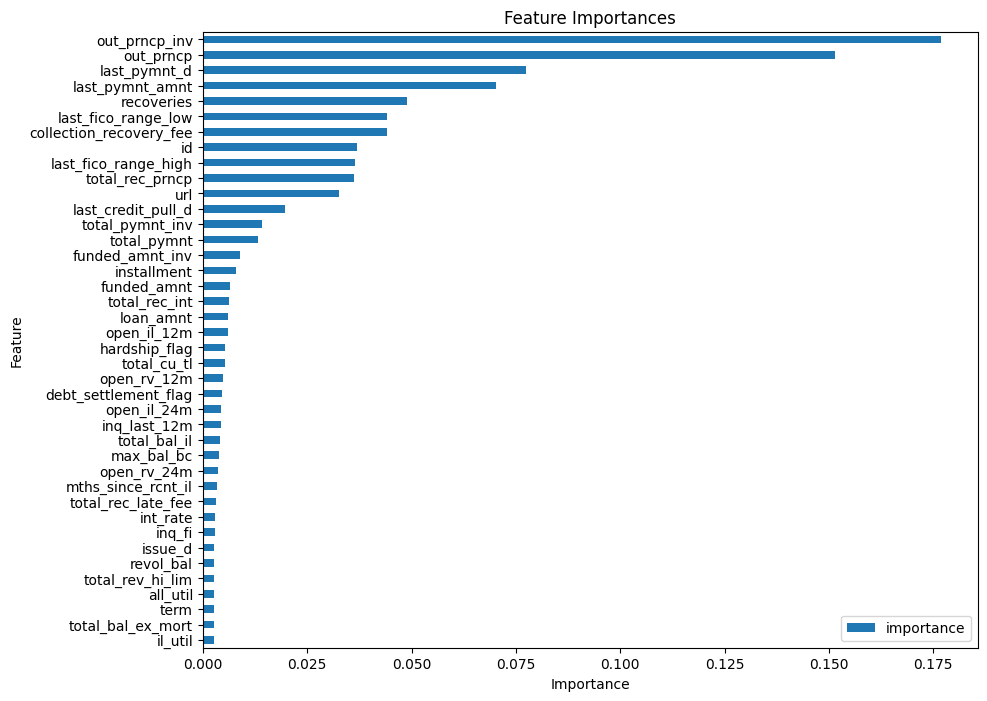

In [ ]:
# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Sort feature importances by descending order
top_k_feature_importances = top_k_feature_importances.sort_values('importance', ascending=True)

# Create a horizontal bar plot of feature importances
top_k_feature_importances.plot.barh(ax=ax)

# Set the title and axis labels
ax.set_title('Feature Importances')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

# Show the plot
plt.show()


# 2. Descriptive Analytics

> ## 2.1 Summary Statistics

In [ ]:
clean_df.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,...,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06,2.925493e+06
mean,9.782966e+07,1.535878e+04,1.535470e+04,1.534005e+04,1.304540e-01,4.523914e+02,7.993727e+04,1.929648e+01,2.897010e-01,7.005110e+02,...,7.688000e-02,2.071412e+00,9.429818e+01,4.007288e+01,1.226790e-01,3.614200e-02,1.832436e+05,5.265770e+04,2.476471e+04,4.543161e+04
std,5.116335e+07,9.478382e+03,9.477143e+03,9.480633e+03,4.860800e-02,2.729478e+02,1.117475e+05,1.571142e+01,8.436780e-01,3.376565e+01,...,4.700370e-01,1.819573e+00,8.863379e+00,3.548609e+01,3.530590e-01,3.324460e-01,1.829760e+05,5.137651e+04,2.415725e+04,4.613910e+04
min,5.473400e+04,5.000000e+02,5.000000e+02,0.000000e+00,5.310000e-02,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.100000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.913196e+07,8.000000e+03,8.000000e+03,8.000000e+03,9.170000e-02,2.535000e+02,4.700000e+04,1.209000e+01,0.000000e+00,6.750000e+02,...,0.000000e+00,1.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.360000e+04,2.162900e+04,9.000000e+03,1.600000e+04
50%,1.076106e+08,1.300000e+04,1.300000e+04,1.300000e+04,1.249000e-01,3.823000e+02,6.600000e+04,1.811000e+01,0.000000e+00,6.950000e+02,...,0.000000e+00,2.000000e+00,1.000000e+02,3.330000e+01,0.000000e+00,0.000000e+00,1.237030e+05,3.953900e+04,1.790000e+04,3.495800e+04
75%,1.432202e+08,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e-01,6.039200e+02,9.500000e+04,2.487000e+01,0.000000e+00,7.200000e+02,...,0.000000e+00,3.000000e+00,1.000000e+02,6.670000e+01,0.000000e+00,0.000000e+00,2.603800e+05,6.573600e+04,3.210000e+04,6.006200e+04
max,1.710171e+08,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e-01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,...,5.800000e+01,3.200000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.569000e+06,2.118996e+06


> # 2.2 Visualizations

## Categorical and Numeric Columns

In [ ]:
numeric = sampled_df.select_dtypes(include=['float64']).columns
categorical = sampled_df.select_dtypes(exclude=['float64']).columns

In [ ]:
top_k_feature_importances = top_k_feature_importances.sort_values(by='importance', ascending=False)
selected_columns = top_k_feature_importances['importance'].keys()
num_cols = [col for col in selected_columns if col in numeric]
cat_cols = [col for col in selected_columns if col in categorical]

> ## 2.2.1 Histogram

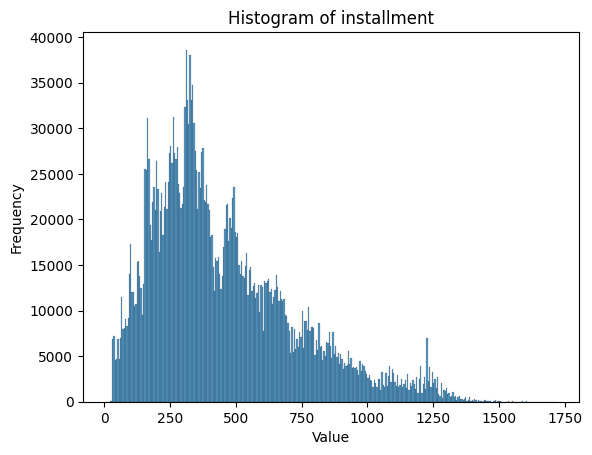

In [ ]:
column_name = 'installment'
sns.histplot(clean_df[column_name].to_numpy())
plt.title(f'Histogram of {column_name}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

> ## 2.2.2 BoxPlot

**Univariate analysis using BoxPlot**

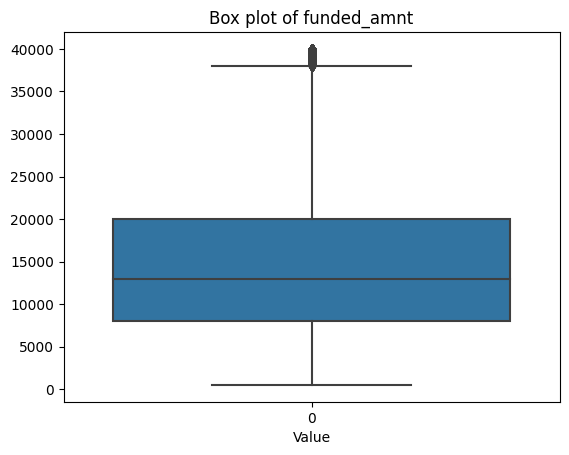

In [ ]:
column_name = 'funded_amnt'
data = clean_df[column_name].to_numpy()

sns.boxplot(data)
plt.title(f'Box plot of {column_name}')
plt.xlabel('Value')
plt.show()

# total_rec_prncp, loan_amnt, total_pymnt

**Bivariate analysis using BoxPlot**

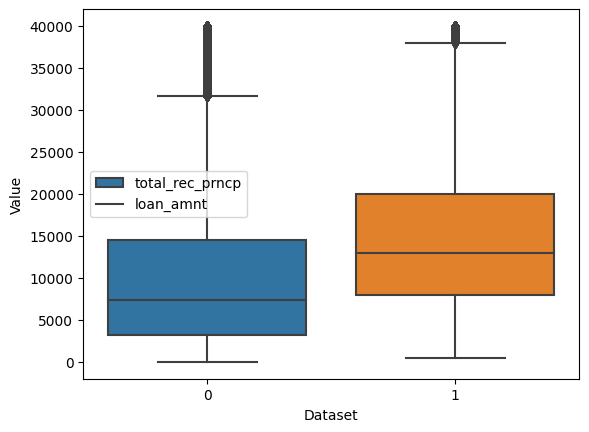

In [ ]:
# Create a box plot of two numeric columns
fig, ax = plt.subplots()
sns.boxplot(data=[clean_df['total_rec_prncp'].to_numpy(), clean_df['loan_amnt'].to_numpy()], ax=ax)

# Add labels and legend
ax.set_xlabel('Dataset')
ax.set_ylabel('Value')
ax.legend(['total_rec_prncp', 'loan_amnt'])

# Show the plot
plt.show()

> ## 2.2.3 Scatter Plot

INFO:distributed.core:Event loop was unresponsive in Nanny for 14.55s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.
INFO:distributed.core:Event loop was unresponsive in Scheduler for 14.56s.  This is often caused by long-running GIL-holding functions or moving large chunks of data. This can cause timeouts and instability.


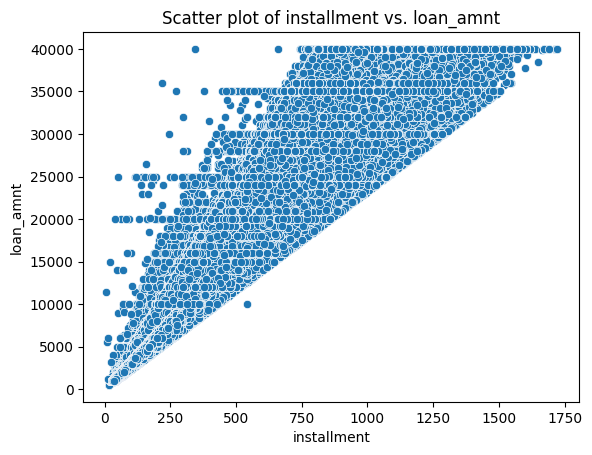

In [ ]:
x_column = 'installment'
y_column = 'loan_amnt'
sns.scatterplot(x=clean_df[x_column].to_numpy(), y=clean_df[y_column].to_numpy())
plt.title(f'Scatter plot of {x_column} vs. {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

> ## 2.2.4 KDE Plot

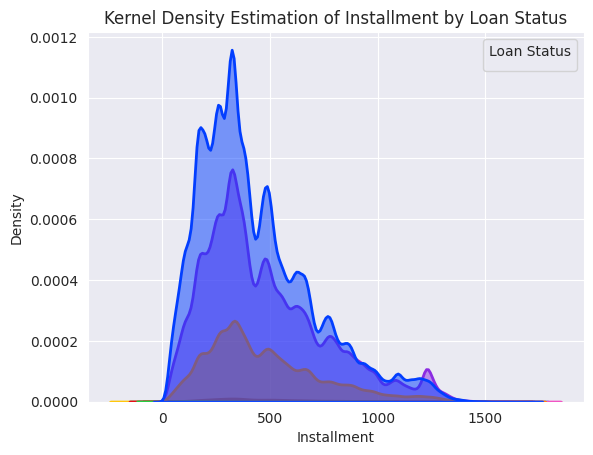

In [ ]:
# Set plot style
sns.set_style("darkgrid")

# Create the plot
sns.kdeplot(data=clean_df.to_pandas(), x="installment", hue="loan_status", fill=True, alpha=0.5, linewidth=2, palette="bright")

# Add a title and labels
plt.title("Kernel Density Estimation of Installment by Loan Status")
plt.xlabel("Installment")
plt.ylabel("Density")

# Add a legend
plt.legend(title="Loan Status", loc="upper right")

# Show the plot
plt.show()

# 3. Diagnostic Analytics

> ## 3.1 Correlation Matrix

INFO:distributed.utils_perf:full garbage collection released 36.69 MiB from 14623 reference cycles (threshold: 9.54 MiB)


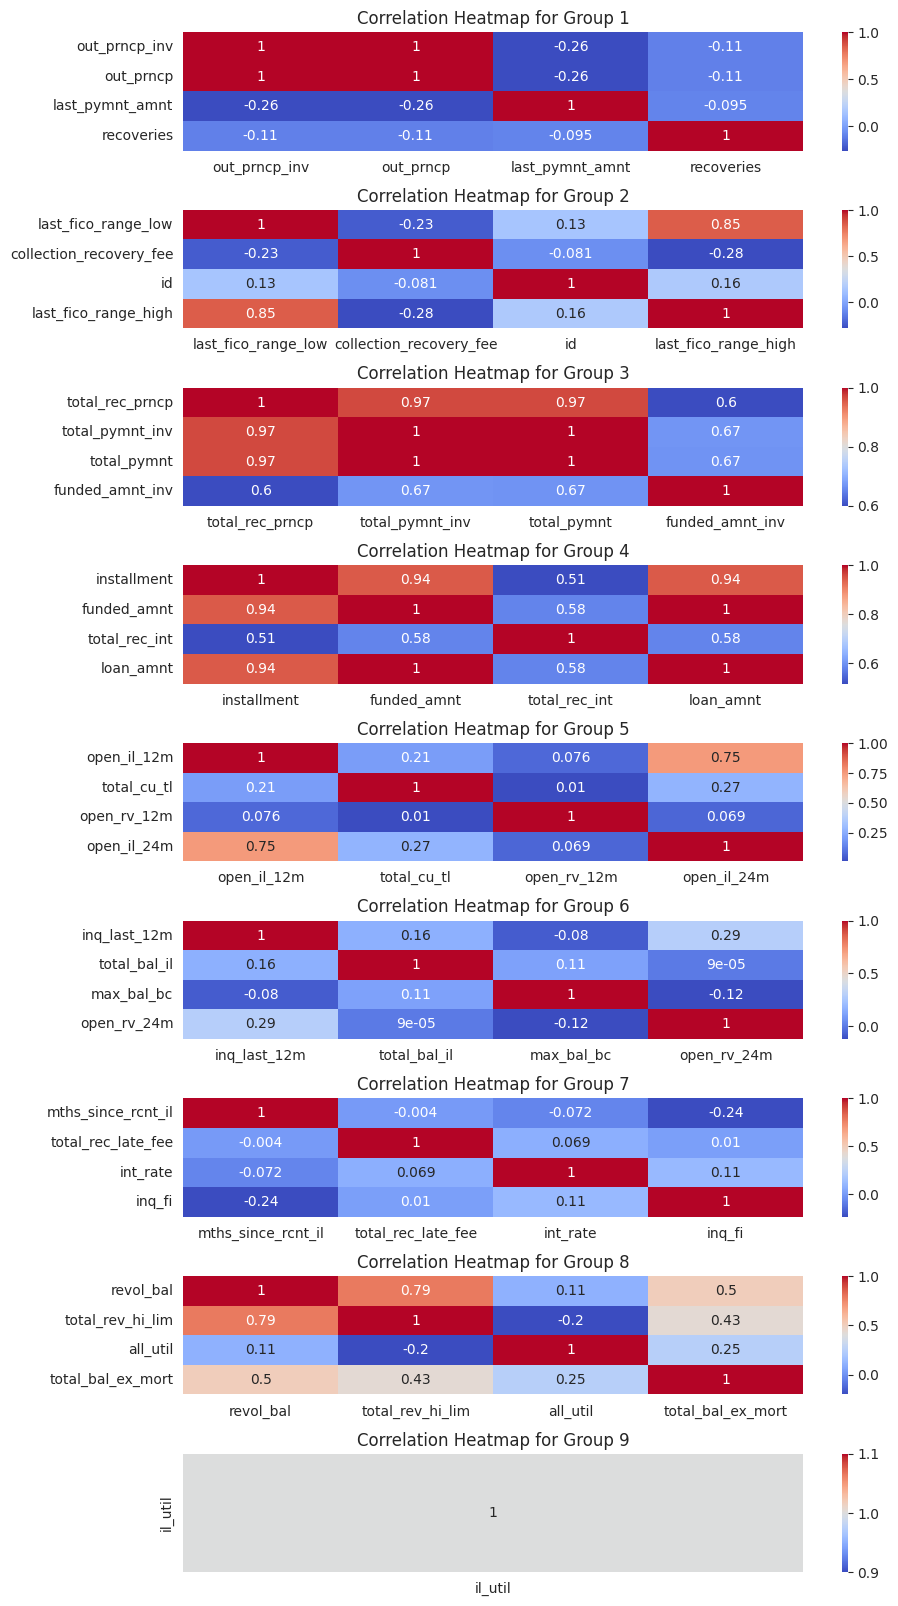

In [ ]:
# Group the numeric columns into groups of 4
groups = [num_cols[i:i+4] for i in range(0, len(num_cols), 4)]
fig, axs = plt.subplots(nrows=len(groups), ncols=1, figsize=(10, 20))

# Plot heatmap for each group of 4 columns
for i, group in enumerate(groups):
    corr = clean_df[group].corr().to_pandas()
    sns.heatmap(corr, cmap='coolwarm', annot=True, ax=axs[i])
    axs[i].set_title('Correlation Heatmap for Group {}'.format(i+1))
    axs[i].set_xticklabels(group, ha='center')

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.5)

# Show plot
plt.show()

> ## 3.2 WordCloud

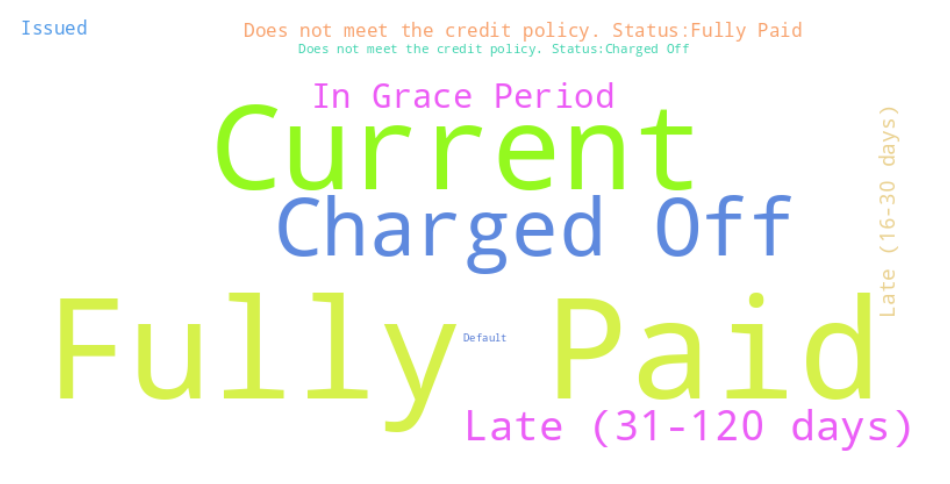

In [ ]:
# Get word frequencies
word_frequencies = clean_df['loan_status'].to_pandas().value_counts()

# Generate random colors
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(random.uniform(0, 360))
    s = int(random.uniform(60, 100))
    l = int(random.uniform(50, 80))
    return "hsl({}, {}%, {}%)".format(h, s, l)

# Generate word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, color_func=random_color_func).generate_from_frequencies(word_frequencies)

# Plot word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
